In [1]:
import joblib
# Load gene data
X_train_genes, X_test_genes, y_train_genes_cat, y_test_genes_cat, \
y_train_genes_int, y_test_genes_int, gene_label_encoder = joblib.load('0.95processed_gene_data.pkl')

# Load image data
X_train_images, X_test_images, y_train_images, y_test_images, image_label_encoder = joblib.load('0.95processed_image_data.pkl')

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END ..C=0.01, gamma=0.0001, kernel=rbf;, score=0.262 total time=  16.5s
[CV 2/5] END ..C=0.01, gamma=0.0001, kernel=rbf;, score=0.262 total time=  16.3s
[CV 3/5] END ..C=0.01, gamma=0.0001, kernel=rbf;, score=0.265 total time=  16.8s
[CV 4/5] END ..C=0.01, gamma=0.0001, kernel=rbf;, score=0.263 total time=  16.6s
[CV 5/5] END ..C=0.01, gamma=0.0001, kernel=rbf;, score=0.263 total time=  16.5s
[CV 1/5] END ...C=0.01, gamma=1e-05, kernel=rbf;, score=0.262 total time=  17.0s
[CV 2/5] END ...C=0.01, gamma=1e-05, kernel=rbf;, score=0.262 total time=  16.4s
[CV 3/5] END ...C=0.01, gamma=1e-05, kernel=rbf;, score=0.265 total time=  16.2s
[CV 4/5] END ...C=0.01, gamma=1e-05, kernel=rbf;, score=0.263 total time=  16.4s
[CV 5/5] END ...C=0.01, gamma=1e-05, kernel=rbf;, score=0.263 total time=  16.7s
[CV 1/5] END ...C=0.01, gamma=1e-06, kernel=rbf;, score=0.262 total time=  16.8s
[CV 2/5] END ...C=0.01, gamma=1e-06, kernel=rbf;

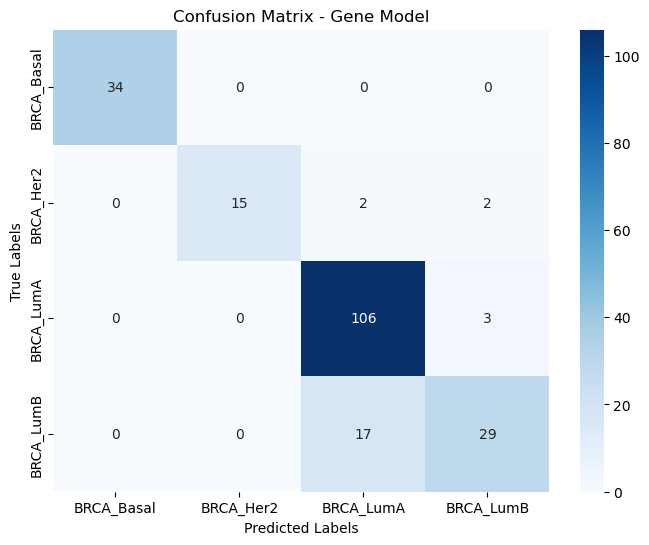


SVM Image Accuracy: 0.5866
SVM Image MCC: 0.3451
SVM Image AUC: 0.7605

Image Model Classification Report:
              precision    recall  f1-score   support

  BRCA_Basal       0.59      0.59      0.59        34
   BRCA_Her2       0.50      0.06      0.10        18
   BRCA_LumA       0.68      0.83      0.75        88
   BRCA_LumB       0.31      0.28      0.29        39

    accuracy                           0.59       179
   macro avg       0.52      0.44      0.43       179
weighted avg       0.56      0.59      0.55       179



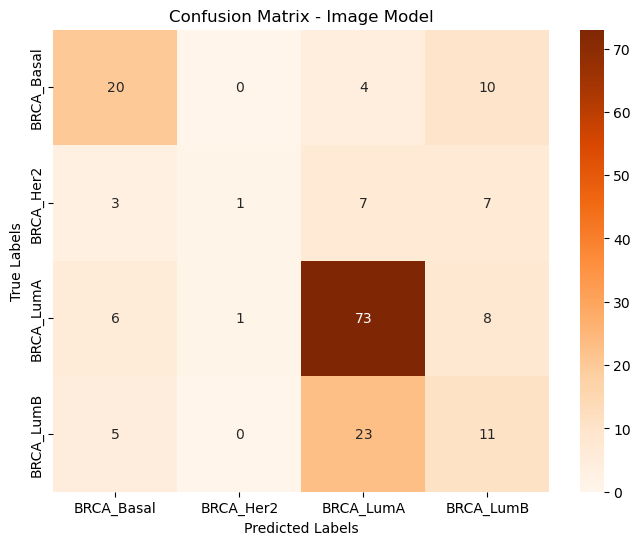


Fusion Model Accuracy: 0.8659
Fusion Model MCC: 0.7911
Fusion Model AUC: 0.9655

Fusion Model Classification Report:
              precision    recall  f1-score   support

  BRCA_Basal       1.00      1.00      1.00        28
   BRCA_Her2       1.00      0.72      0.84        18
   BRCA_LumA       0.83      0.98      0.90        94
   BRCA_LumB       0.81      0.56      0.67        39

    accuracy                           0.87       179
   macro avg       0.91      0.82      0.85       179
weighted avg       0.87      0.87      0.86       179



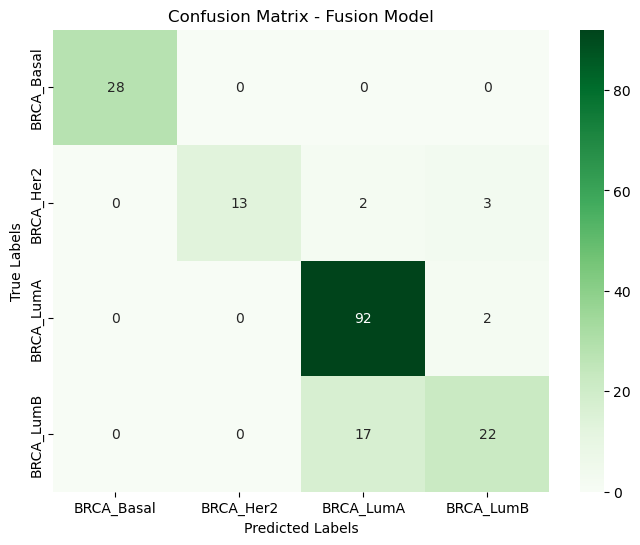

In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (accuracy_score, classification_report, 
                             confusion_matrix, matthews_corrcoef, roc_auc_score)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------
# Gene Data: SVM with RBF Kernel and Grid Search
# ------------------------------------------
param_grid_gene = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.0001, 0.00001, 0.000001],
    'kernel': ['rbf']
}

svm_gene = SVC(probability=True)
grid_search_gene = GridSearchCV(svm_gene, param_grid_gene, cv=5, verbose=3)
grid_search_gene.fit(X_train_genes, y_train_genes_int)

# Evaluate Gene Model
pred_gene_probs = grid_search_gene.best_estimator_.predict_proba(X_test_genes)
pred_gene = np.argmax(pred_gene_probs, axis=1)
accuracy_gene = accuracy_score(y_test_genes_int, pred_gene)
mcc_gene = matthews_corrcoef(y_test_genes_int, pred_gene)
conf_matrix_gene = confusion_matrix(y_test_genes_int, pred_gene)
print(f"SVM Gene Accuracy: {accuracy_gene:.4f}")
print(f"SVM Gene MCC: {mcc_gene:.4f}")

# AUC for Gene Model
try:
    auc_gene = roc_auc_score(y_test_genes_int, pred_gene_probs, multi_class='ovr')
    print(f"SVM Gene AUC: {auc_gene:.4f}")
except ValueError as e:
    print(f"SVM Gene AUC Error: {e}")

# Classification Report for Gene Model
print("\nGene Model Classification Report:")
print(classification_report(y_test_genes_int, pred_gene, target_names=gene_label_encoder.classes_))

# Gene Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gene, annot=True, fmt='d', cmap='Blues', 
            xticklabels=gene_label_encoder.classes_, yticklabels=gene_label_encoder.classes_)
plt.title("Confusion Matrix - Gene Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# ------------------------------------------
# Image Data: SVM with RBF Kernel and Grid Search
# ------------------------------------------
param_grid_image = {
    'C': [0.01, 0.1, 1, 10, 50],
    'gamma': [0.001, 0.0001, 0.00001],
    'kernel': ['rbf']
}

svm_image = SVC(probability=True)
grid_search_image = GridSearchCV(svm_image, param_grid_image, cv=5)
grid_search_image.fit(X_train_images, y_train_images)

# Evaluate Image Model
pred_image_probs = grid_search_image.best_estimator_.predict_proba(X_test_images)
pred_image = np.argmax(pred_image_probs, axis=1)
accuracy_image = accuracy_score(y_test_images, pred_image)
mcc_image = matthews_corrcoef(y_test_images, pred_image)
conf_matrix_image = confusion_matrix(y_test_images, pred_image)
print(f"\nSVM Image Accuracy: {accuracy_image:.4f}")
print(f"SVM Image MCC: {mcc_image:.4f}")

# AUC for Image Model
try:
    auc_image = roc_auc_score(y_test_images, pred_image_probs, multi_class='ovr')
    print(f"SVM Image AUC: {auc_image:.4f}")
except ValueError as e:
    print(f"SVM Image AUC Error: {e}")

# Classification Report for Image Model
print("\nImage Model Classification Report:")
print(classification_report(y_test_images, pred_image, target_names=gene_label_encoder.classes_))

# Image Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_image, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=gene_label_encoder.classes_, yticklabels=gene_label_encoder.classes_)
plt.title("Confusion Matrix - Image Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# ------------------------------------------
# Fusion Model: Fusion of SVM Outputs
# ------------------------------------------
# Align predictions
min_samples = min(pred_gene_probs.shape[0], pred_image_probs.shape[0])
pred_gene_aligned = pred_gene_probs[:min_samples]
pred_image_aligned = pred_image_probs[:min_samples]
y_test_aligned = y_test_genes_int[:min_samples]

# Fusion with weighted average
alpha, beta = 0.88185, 0.11815
fused_predictions = alpha * pred_gene_aligned + beta * pred_image_aligned
final_predictions = np.argmax(fused_predictions, axis=1)

# Evaluate Fusion Model
accuracy_fusion = accuracy_score(y_test_aligned, final_predictions)
mcc_fusion = matthews_corrcoef(y_test_aligned, final_predictions)
conf_matrix_fusion = confusion_matrix(y_test_aligned, final_predictions)
print(f"\nFusion Model Accuracy: {accuracy_fusion:.4f}")
print(f"Fusion Model MCC: {mcc_fusion:.4f}")

# AUC for Fusion Model
try:
    auc_fusion = roc_auc_score(y_test_aligned, fused_predictions, multi_class='ovr')
    print(f"Fusion Model AUC: {auc_fusion:.4f}")
except ValueError as e:
    print(f"Fusion Model AUC Error: {e}")

# Classification Report for Fusion Model
print("\nFusion Model Classification Report:")
print(classification_report(y_test_aligned, final_predictions, target_names=gene_label_encoder.classes_))

# Fusion Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_fusion, annot=True, fmt='d', cmap='Greens', 
            xticklabels=gene_label_encoder.classes_, yticklabels=gene_label_encoder.classes_)
plt.title("Confusion Matrix - Fusion Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5] END C=0.01, degree=2, gamma=0.0001, kernel=poly;, score=0.814 total time=  11.1s
[CV 2/5] END C=0.01, degree=2, gamma=0.0001, kernel=poly;, score=0.873 total time=  11.1s
[CV 3/5] END C=0.01, degree=2, gamma=0.0001, kernel=poly;, score=0.851 total time=  11.3s
[CV 4/5] END C=0.01, degree=2, gamma=0.0001, kernel=poly;, score=0.782 total time=   7.3s
[CV 5/5] END C=0.01, degree=2, gamma=0.0001, kernel=poly;, score=0.825 total time=   5.9s
[CV 1/5] END C=0.01, degree=2, gamma=1e-05, kernel=poly;, score=0.262 total time=   7.1s
[CV 2/5] END C=0.01, degree=2, gamma=1e-05, kernel=poly;, score=0.262 total time=   7.4s
[CV 3/5] END C=0.01, degree=2, gamma=1e-05, kernel=poly;, score=0.265 total time=   7.5s
[CV 4/5] END C=0.01, degree=2, gamma=1e-05, kernel=poly;, score=0.263 total time=   7.5s
[CV 5/5] END C=0.01, degree=2, gamma=1e-05, kernel=poly;, score=0.263 total time=   7.3s
[CV 1/5] END C=0.01, degree=2, gamma=1e-06,

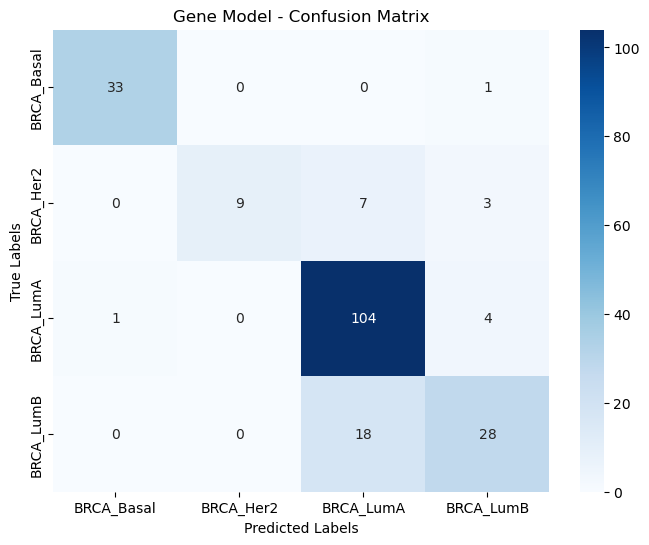

Gene Model MCC: 0.7406
Gene Model AUC: 0.9578
Image SVM Accuracy: 0.5642

Image Model Classification Report:
              precision    recall  f1-score   support

  BRCA_Basal       0.60      0.35      0.44        34
   BRCA_Her2       0.00      0.00      0.00        18
   BRCA_LumA       0.58      0.91      0.71        88
   BRCA_LumB       0.43      0.23      0.30        39

    accuracy                           0.56       179
   macro avg       0.40      0.37      0.36       179
weighted avg       0.49      0.56      0.50       179



C:\Users\vinay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vinay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vinay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


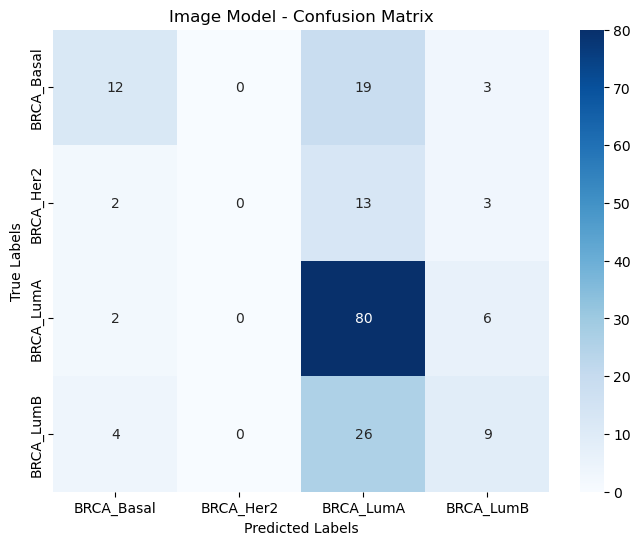

Image Model MCC: 0.2757
Image Model AUC: 0.7140
Fusion Model Accuracy: 0.8212

Fusion Model Classification Report:
              precision    recall  f1-score   support

  BRCA_Basal       0.97      1.00      0.98        28
   BRCA_Her2       1.00      0.44      0.62        18
   BRCA_LumA       0.79      0.95      0.86        94
   BRCA_LumB       0.76      0.56      0.65        39

    accuracy                           0.82       179
   macro avg       0.88      0.74      0.78       179
weighted avg       0.83      0.82      0.81       179



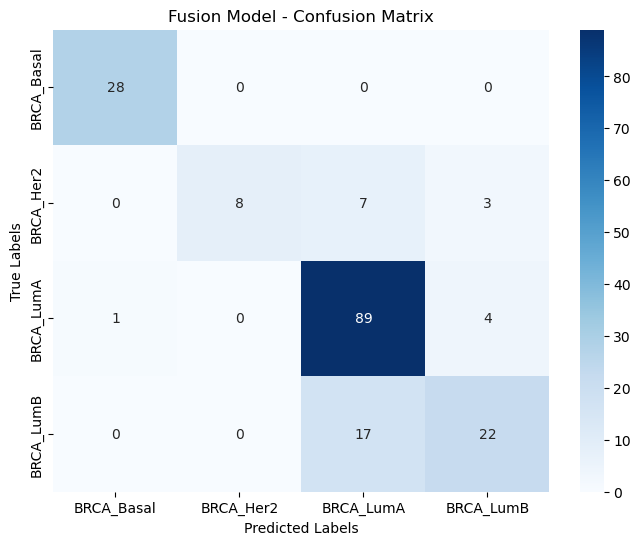

Fusion Model MCC: 0.7164
Fusion Model AUC: 0.9474


In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, 
    matthews_corrcoef, roc_auc_score
)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ===========================
# SVM for Gene Data
# ===========================
param_grid_gene = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.0001, 0.00001, 0.000001],
    'kernel': ['poly'],
    'degree': [2, 3, 4]
}

svm_gene = SVC(probability=True)
grid_search_gene = GridSearchCV(svm_gene, param_grid_gene, cv=5, verbose=3)
grid_search_gene.fit(X_train_genes, y_train_genes_int)

# Predictions and Probabilities
pred_gene_probs = grid_search_gene.best_estimator_.predict_proba(X_test_genes)
pred_gene = np.argmax(pred_gene_probs, axis=1)

# Accuracy
accuracy_gene = accuracy_score(y_test_genes_int, pred_gene)
print(f"Gene SVM Accuracy: {accuracy_gene:.4f}")

# Classification Report
print("\nGene Model Classification Report:")
print(classification_report(y_test_genes_int, pred_gene, target_names=gene_label_encoder.classes_))

# Confusion Matrix
conf_matrix_gene = confusion_matrix(y_test_genes_int, pred_gene)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gene, annot=True, fmt='d', cmap='Blues', 
            xticklabels=gene_label_encoder.classes_, 
            yticklabels=gene_label_encoder.classes_)
plt.title('Gene Model - Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Matthews Correlation Coefficient (MCC)
mcc_gene = matthews_corrcoef(y_test_genes_int, pred_gene)
print(f"Gene Model MCC: {mcc_gene:.4f}")

# AUC Score
try:
    auc_gene = roc_auc_score(y_test_genes_int, pred_gene_probs, multi_class='ovr', average='weighted')
    print(f"Gene Model AUC: {auc_gene:.4f}")
except ValueError as e:
    print(f"Gene Model AUC calculation error: {e}")

# ===========================
# SVM for Image Data
# ===========================
param_grid_image = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.0001, 0.00001],
    'kernel': ['poly'],
    'degree': [2, 3, 4]
}

svm_image = SVC(probability=True)
grid_search_image = GridSearchCV(svm_image, param_grid_image, cv=5)
grid_search_image.fit(X_train_images, y_train_images)

# Predictions and Probabilities
pred_image_probs = grid_search_image.best_estimator_.predict_proba(X_test_images)
pred_image = np.argmax(pred_image_probs, axis=1)

# Accuracy
accuracy_image = accuracy_score(y_test_images, pred_image)
print(f"Image SVM Accuracy: {accuracy_image:.4f}")

# Classification Report
print("\nImage Model Classification Report:")
print(classification_report(y_test_images, pred_image, target_names=gene_label_encoder.classes_))

# Confusion Matrix
conf_matrix_image = confusion_matrix(y_test_images, pred_image)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_image, annot=True, fmt='d', cmap='Blues', 
            xticklabels=gene_label_encoder.classes_, 
            yticklabels=gene_label_encoder.classes_)
plt.title('Image Model - Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Matthews Correlation Coefficient (MCC)
mcc_image = matthews_corrcoef(y_test_images, pred_image)
print(f"Image Model MCC: {mcc_image:.4f}")

# AUC Score
try:
    auc_image = roc_auc_score(y_test_images, pred_image_probs, multi_class='ovr', average='weighted')
    print(f"Image Model AUC: {auc_image:.4f}")
except ValueError as e:
    print(f"Image Model AUC calculation error: {e}")

# ===========================
# Fusion of Gene and Image SVM Outputs
# ===========================
min_samples = min(pred_gene_probs.shape[0], pred_image_probs.shape[0])
pred_gene_aligned = pred_gene_probs[:min_samples]
pred_image_aligned = pred_image_probs[:min_samples]
y_test_aligned = y_test_genes_int[:min_samples]

# Weighted Fusion
alpha, beta = 0.88185, 0.11815
fused_predictions = alpha * pred_gene_aligned + beta * pred_image_aligned
final_predictions = np.argmax(fused_predictions, axis=1)

# Accuracy
accuracy_fusion = accuracy_score(y_test_aligned, final_predictions)
print(f"Fusion Model Accuracy: {accuracy_fusion:.4f}")

# Classification Report
print("\nFusion Model Classification Report:")
print(classification_report(y_test_aligned, final_predictions, 
                            target_names=gene_label_encoder.classes_))

# Confusion Matrix
conf_matrix_fusion = confusion_matrix(y_test_aligned, final_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_fusion, annot=True, fmt='d', cmap='Blues', 
            xticklabels=gene_label_encoder.classes_, 
            yticklabels=gene_label_encoder.classes_)
plt.title('Fusion Model - Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Matthews Correlation Coefficient (MCC)
mcc_fusion = matthews_corrcoef(y_test_aligned, final_predictions)
print(f"Fusion Model MCC: {mcc_fusion:.4f}")

# AUC Score
try:
    auc_fusion = roc_auc_score(y_test_aligned, fused_predictions, multi_class='ovr', average='weighted')
    print(f"Fusion Model AUC: {auc_fusion:.4f}")
except ValueError as e:
    print(f"Fusion Model AUC calculation error: {e}")


C:\Users\vinay\AppData\Local\Temp\ipykernel_19296\2391523710.py:13: RuntimeWarning: overflow encountered in cosh
  result = np.log(np.power(np.cosh(a * dot_product), p))


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END .......C=0.001, kernel=precomputed;, score=0.662 total time=   0.4s
[CV 2/5] END .......C=0.001, kernel=precomputed;, score=0.800 total time=   0.3s
[CV 3/5] END .......C=0.001, kernel=precomputed;, score=0.794 total time=   0.5s
[CV 4/5] END .......C=0.001, kernel=precomputed;, score=0.757 total time=   0.4s
[CV 5/5] END .......C=0.001, kernel=precomputed;, score=0.782 total time=   0.4s
[CV 1/5] END ........C=0.01, kernel=precomputed;, score=0.862 total time=   0.3s
[CV 2/5] END ........C=0.01, kernel=precomputed;, score=0.873 total time=   0.3s
[CV 3/5] END ........C=0.01, kernel=precomputed;, score=0.896 total time=   0.3s
[CV 4/5] END ........C=0.01, kernel=precomputed;, score=0.901 total time=   0.3s
[CV 5/5] END ........C=0.01, kernel=precomputed;, score=0.864 total time=   0.3s
[CV 1/5] END .........C=0.1, kernel=precomputed;, score=0.808 total time=   0.4s
[CV 2/5] END .........C=0.1, kernel=precomputed;,

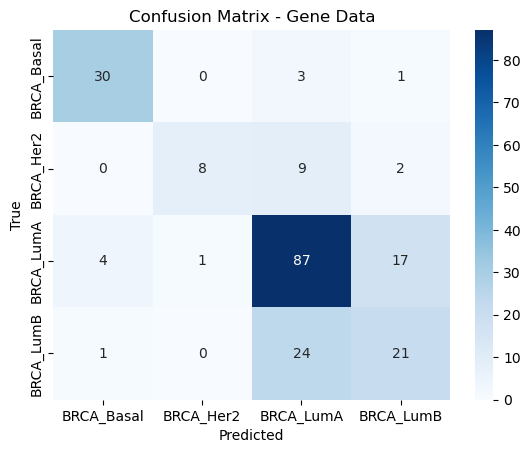


Classification Report - Gene Data:
              precision    recall  f1-score   support

  BRCA_Basal       0.86      0.88      0.87        34
   BRCA_Her2       0.89      0.42      0.57        19
   BRCA_LumA       0.71      0.80      0.75       109
   BRCA_LumB       0.51      0.46      0.48        46

    accuracy                           0.70       208
   macro avg       0.74      0.64      0.67       208
weighted avg       0.71      0.70      0.69       208

MCC - Gene Data: 0.5191
AUC - Gene Data: 0.8684
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END .......C=0.001, kernel=precomputed;, score=0.084 total time=   0.0s
[CV 2/5] END .......C=0.001, kernel=precomputed;, score=0.252 total time=   0.0s
[CV 3/5] END .......C=0.001, kernel=precomputed;, score=0.252 total time=   0.0s
[CV 4/5] END .......C=0.001, kernel=precomputed;, score=0.252 total time=   0.0s
[CV 5/5] END .......C=0.001, kernel=precomputed;, score=0.472 total time=   0.0s
[CV 1/5] END ...

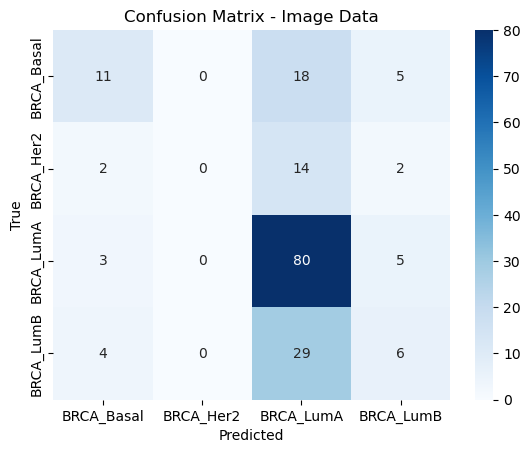


Classification Report - Image Data:
              precision    recall  f1-score   support

  BRCA_Basal       0.55      0.32      0.41        34
   BRCA_Her2       0.00      0.00      0.00        18
   BRCA_LumA       0.57      0.91      0.70        88
   BRCA_LumB       0.33      0.15      0.21        39

    accuracy                           0.54       179
   macro avg       0.36      0.35      0.33       179
weighted avg       0.46      0.54      0.47       179

MCC - Image Data: 0.2290
AUC - Image Data: 0.6778
Fusion Model Accuracy: 0.7039


C:\Users\vinay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vinay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vinay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


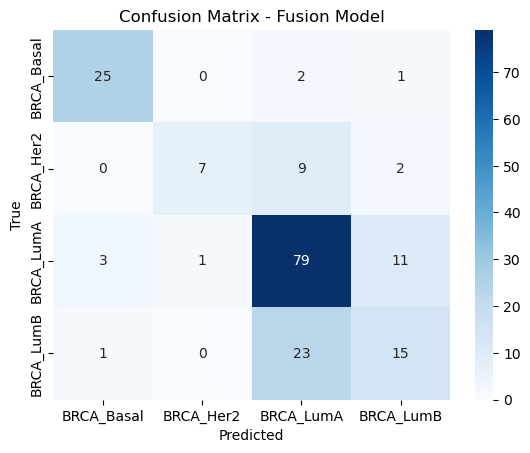


Classification Report - Fusion Model:
              precision    recall  f1-score   support

  BRCA_Basal       0.86      0.89      0.88        28
   BRCA_Her2       0.88      0.39      0.54        18
   BRCA_LumA       0.70      0.84      0.76        94
   BRCA_LumB       0.52      0.38      0.44        39

    accuracy                           0.70       179
   macro avg       0.74      0.63      0.66       179
weighted avg       0.70      0.70      0.69       179

MCC - Fusion Model: 0.5184
AUC - Fusion Model: 0.8555


In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, matthews_corrcoef, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Custom utility kernel function
def utilitykernel(x1, x2, a, p=1):
    x1 = x1.flatten()
    x2 = x2.flatten()
    dot_product = np.dot(x1, x2)
    result = np.log(np.power(np.cosh(a * dot_product), p))
    max_value = 700
    return np.clip(result, -max_value, max_value)

# Custom Gram matrix computation
def gaussianKernelGramMatrix(X1, X2, a, K_function=utilitykernel):
    gram_matrix = np.zeros((X1.shape[0], X2.shape[0]))
    for i, x1 in enumerate(X1):
        for j, x2 in enumerate(X2):
            gram_matrix[i, j] = K_function(x1, x2, a)
    return gram_matrix

# Parameters for the custom kernel
a = 0.001
p = 2

# Generate Gram matrices for gene data
X_train_gene_gram = gaussianKernelGramMatrix(X_train_genes, X_train_genes, a)
X_test_gene_gram = gaussianKernelGramMatrix(X_test_genes, X_train_genes, a)

# SVM with custom kernel and Grid Search for gene data
param_grid_gene = {
    'C': [0.001, 0.01, 0.1, 1, 10, 50],
    'kernel': ['precomputed'],
}

svm_gene = SVC(probability=True, class_weight='balanced', random_state=42)
grid_search_gene = GridSearchCV(svm_gene, param_grid_gene, cv=5, verbose=3)
grid_search_gene.fit(X_train_gene_gram, y_train_genes_int)

# Evaluate SVM on gene data
y_pred_gene_probs = grid_search_gene.best_estimator_.predict_proba(X_test_gene_gram)
y_pred_gene = np.argmax(y_pred_gene_probs, axis=1)
gene_accuracy = accuracy_score(y_test_genes_int, y_pred_gene)
print(f"SVM Gene Accuracy with Custom Kernel: {gene_accuracy:.4f}")

# Confusion matrix for gene data
cm_gene = confusion_matrix(y_test_genes_int, y_pred_gene)
sns.heatmap(cm_gene, annot=True, fmt='d', cmap='Blues', xticklabels=gene_label_encoder.classes_, yticklabels=gene_label_encoder.classes_)
plt.title('Confusion Matrix - Gene Data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report for gene data
print("\nClassification Report - Gene Data:")
print(classification_report(y_test_genes_int, y_pred_gene, target_names=gene_label_encoder.classes_))

# Matthews Correlation Coefficient (MCC) for gene data
mcc_gene = matthews_corrcoef(y_test_genes_int, y_pred_gene)
print(f"MCC - Gene Data: {mcc_gene:.4f}")

# AUC for gene data (multi-class)
auc_gene = roc_auc_score(y_test_genes_int, y_pred_gene_probs, multi_class='ovr')
print(f"AUC - Gene Data: {auc_gene:.4f}")


# Generate Gram matrices for image data
X_train_image_gram = gaussianKernelGramMatrix(X_train_images, X_train_images, a)
X_test_image_gram = gaussianKernelGramMatrix(X_test_images, X_train_images, a)

# SVM with custom kernel and Grid Search for image data
param_grid_image = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['precomputed'],
}

svm_image = SVC(probability=True, class_weight='balanced', random_state=42)
grid_search_image = GridSearchCV(svm_image, param_grid_image, cv=5, verbose=3)
grid_search_image.fit(X_train_image_gram, y_train_images)

# Evaluate SVM on image data
y_pred_image_probs = grid_search_image.best_estimator_.predict_proba(X_test_image_gram)
y_pred_image = np.argmax(y_pred_image_probs, axis=1)
image_accuracy = accuracy_score(y_test_images, y_pred_image)
print(f"SVM Image Accuracy with Custom Kernel: {image_accuracy:.4f}")

# Confusion matrix for image data
cm_image = confusion_matrix(y_test_images, y_pred_image)
sns.heatmap(cm_image, annot=True, fmt='d', cmap='Blues', xticklabels=image_label_encoder.classes_, yticklabels=image_label_encoder.classes_)
plt.title('Confusion Matrix - Image Data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report for image data
print("\nClassification Report - Image Data:")
print(classification_report(y_test_images, y_pred_image, target_names=image_label_encoder.classes_))

# Matthews Correlation Coefficient (MCC) for image data
mcc_image = matthews_corrcoef(y_test_images, y_pred_image)
print(f"MCC - Image Data: {mcc_image:.4f}")

# AUC for image data (multi-class)
auc_image = roc_auc_score(y_test_images, y_pred_image_probs, multi_class='ovr')
print(f"AUC - Image Data: {auc_image:.4f}")


# Align prediction arrays for fusion
min_samples = min(y_pred_gene_probs.shape[0], y_pred_image_probs.shape[0])
pred_gene_aligned = y_pred_gene_probs[:min_samples]
pred_image_aligned = y_pred_image_probs[:min_samples]
y_test_aligned = y_test_genes_int[:min_samples]

# Fusion of SVM outputs
alpha, beta = 0.88185, 0.11815
fused_predictions = alpha * pred_gene_aligned + beta * pred_image_aligned
final_predictions = np.argmax(fused_predictions, axis=1)

# Evaluate fusion model
fusion_accuracy = accuracy_score(y_test_aligned, final_predictions)
print(f"Fusion Model Accuracy: {fusion_accuracy:.4f}")

# Confusion matrix for fusion model
cm_fusion = confusion_matrix(y_test_aligned, final_predictions)
sns.heatmap(cm_fusion, annot=True, fmt='d', cmap='Blues', xticklabels=gene_label_encoder.classes_, yticklabels=gene_label_encoder.classes_)
plt.title('Confusion Matrix - Fusion Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report for fusion model
print("\nClassification Report - Fusion Model:")
print(classification_report(y_test_aligned, final_predictions, target_names=gene_label_encoder.classes_))

# Matthews Correlation Coefficient (MCC) for fusion model
mcc_fusion = matthews_corrcoef(y_test_aligned, final_predictions)
print(f"MCC - Fusion Model: {mcc_fusion:.4f}")

# AUC for fusion model (multi-class)
auc_fusion = roc_auc_score(y_test_aligned, fused_predictions, multi_class='ovr')
print(f"AUC - Fusion Model: {auc_fusion:.4f}")
